In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (4, 3)

In [9]:
import pandas as pd

### Explore the dataset

#### Clinical data

We start with an inspection of the data. These are only the clinical data, then we will dive into the CGM ones.

In [12]:
from problem import _read_clinical_data_and_labels
X, y = _read_clinical_data_and_labels()
df_tot = X.copy()
df_tot['lbl'] = y

In [13]:
from problem import get_train_data, get_test_data

X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

print(f"Number of DT2 diagnosed patients in the training set: {str(y_train.sum()/len(y_train) * 100)[0]}/{len(y_train)}")
print(f"Number of DT2 diagnosed patients in the test set: {str(y_test.sum()/len(y_test) * 100)[0]}/{len(y_test)}")

Number of DT2 diagnosed patients in the training set: 7/139
Number of DT2 diagnosed patients in the test set: 8/69


In [14]:
df_tot.head()

,gender,age,BMI,glycaemia,lbl
1,1,77,25.4,106,0
2,0,42,30.0,92,0
3,0,61,33.8,114,0
4,0,67,26.7,110,0
5,1,53,25.8,106,0


- **gender** : gender of the patient (1 : woman, 0 : man)
- **age** : age of the patient (in years)
- **BMI** : body mass index, in $kg/m^2$ ($weight/height^2$)
- **glycaemia** : basal glycaemia (mg/dL) 

**Univariate statistics**

We can note with the descriptive statistics table that we have approximately the same number of men and women in our dataset. The patients are almost 60 years old in mean (the youngest is 29, the older, 88). 50% of them have a body mass index inferior to 29, the values varying between 18 and 48. For glycaemia, the mean is around 100mg/dL, with a minimum at 78 and a maximum at 135.

In [15]:
df_tot.describe()

,gender,age,BMI,glycaemia,lbl
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.504808,59.600962,29.993237,100.581731,0.081731
std,0.501183,10.094692,4.727201,11.407814,0.274615
min,0.000000,29.000000,18.100000,78.000000,0.000000
25%,0.000000,54.000000,27.000000,92.000000,0.000000
50%,1.000000,61.000000,29.350000,101.000000,0.000000
75%,1.000000,66.000000,32.400000,108.000000,0.000000
max,1.000000,88.000000,48.700000,135.000000,1.000000


In [21]:
df_tot['gender'].value_counts()

1    105
0    103
Name: gender, dtype: int64

<AxesSubplot:ylabel='glycaemia'>

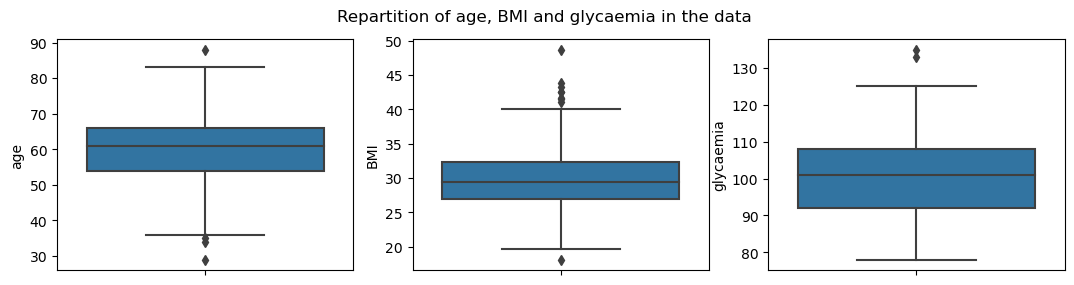

In [29]:
plt.figure(figsize=(13,3))
plt.suptitle("Repartition of age, BMI and glycaemia in the data")
plt.subplot(1,3,1)
sns.boxplot(data=df_tot, y="age")
plt.subplot(1,3,2)
sns.boxplot(data=df_tot, y="BMI")
plt.subplot(1,3,3)
sns.boxplot(data=df_tot, y="glycaemia")

*Remark* :
- the body mass index is often interpreted with the following range of values : underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more). According to our data, the analysed patients are mostly in overweight.
- the value of glycaemia depends strongly on the moment of measurement (be fasting or having eaten before the measurement). A basal glycaemia (be fasting) is considered normal between 70 and 110mg/dL (approximately what we observe on our data, which is consistent with the high number of non-diabetic patients in our data).

$\underline{\text{Label variable}} :$ 1 if the patient has been diagnosed type 2 diabetic / 0 if not

As we can see, our dataset is clearly desequilibrated, with a low number of diagnosed diabetic patients.

In [30]:
df_tot['lbl'].value_counts()

0    191
1     17
Name: lbl, dtype: int64

In [36]:
print("ids of diabetic patients", df_tot[df_tot['lbl']==1].index)

ids of diabetic patients Int64Index([22, 23, 25, 28, 31, 56, 85, 92, 120, 152, 154, 156, 160, 171, 184,
            190, 194],
           dtype='int64')


**Bivariate statistics**

We can study the correlation visually between variables, distinguishing with colors diabetic vs non-diabetic patients.

The following visualisation needs to be taken carefully when analysing the histograms, as we only have 17 diabetic patients (label 1). We observe a low correlation between variables, confirmed by the values of the correlation matrix.

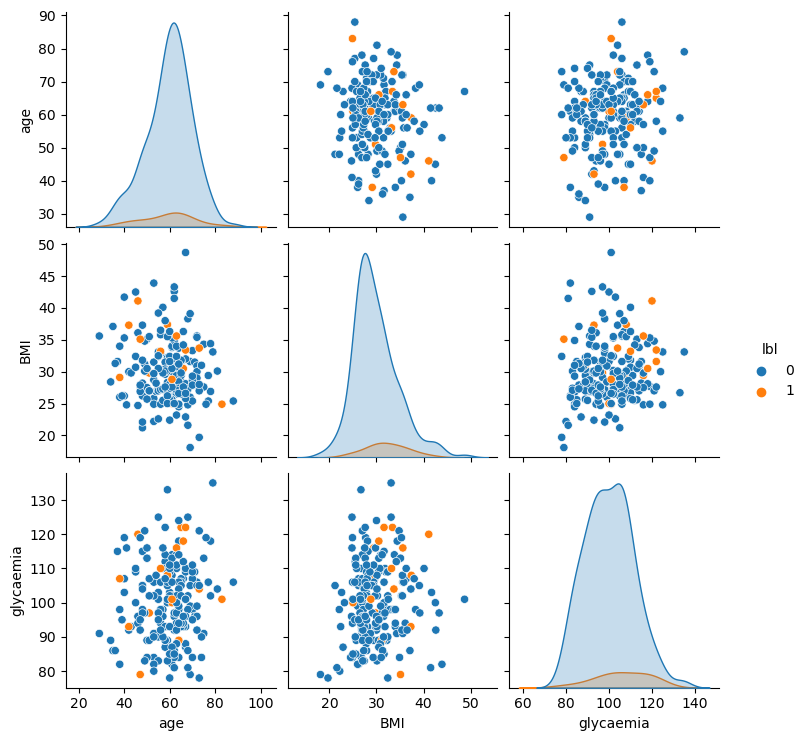

In [20]:
sns.pairplot(data=df_tot.iloc[:,1:], hue="lbl")

<AxesSubplot:title={'center':'Correlation matrix'}>

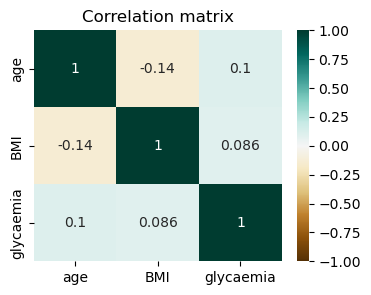

In [43]:
plt.title("Correlation matrix")
sns.heatmap(data=df_tot.iloc[:,1:4].corr(), vmin=-1, vmax=1, cmap="BrBG", annot=True)

#### Focus on the HbA1c

Another variable available in the clinical data is the HbA1c, glycohemoglobin,a form of hemoglobin chemically linked to a sugar. The typical diagnosis of diabetes is done through HbA1c blood measurement, which characterizes the glucose value over 3 months. Above the threshold of 6.5% (approximately and depending on the references), people are characterized diabetic people (as explained in the paper).

One can import the HbA1c measurements of the individual in our dataset. A statistical study is then proceeded.

In [44]:
from problem import get_HbA1c_and_labels_data

df_hba1c = get_HbA1c_and_labels_data()
df_hba1c.head()

,HbA1c,T2DM
1,6.3,False
2,5.8,False
3,5.5,False
4,6.0,False
5,5.2,False


<AxesSubplot:title={'center':'Boxplot of HbA1c for diabetic and non diabetic patients'}, xlabel='T2DM', ylabel='HbA1c'>

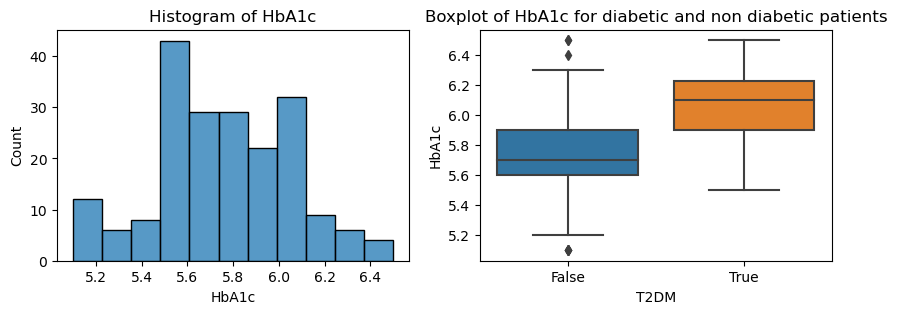

In [56]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("Histogram of HbA1c")
sns.histplot(data=df_hba1c, x="HbA1c")
plt.subplot(1,2,2)
plt.title("Boxplot of HbA1c for diabetic and non diabetic patients")
sns.boxplot(data=df_hba1c, x="T2DM", y="HbA1c")

As expected, the repartition of HbA1c values is different if the patient is diabetic or not. As explained before, since the diagnosis of diabete depends strongly on this value (furthermore obtained with an invasise blood measurement), the objective is to get rid of this variable when trying to predict Type 2 diabete disease.